<h6>Fall 2021 - CPSC 483-02<br>
Project 2 - <br>
Sean Javiya <br>
Jake Wong <br>
</h6>
In Project 1 - Anomaly Detection, we were given a dataset containing a list of students and their Zoom attendance over a 5 week course.<br>We performed various statistical tests on the data, in order to develop a function that will parse the provided dataset and output a list of students who were tardy or under-attended.<br>We developed two functions using different statistical methods of detecting anomalies in the dataset.<br>We conducted an analysis on the results and determined which function was more appropriate for the given dataset.
^rewrite

In [294]:
#import csv
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

headers = []
values = []

#with open('dataset.csv') as csv_data:
#    data_stream = csv.reader(csv_data, delimiter=',')
#    headers = next(data_stream)

xvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=(0,1))
yvalues = np.loadtxt("dataset.csv", delimiter=",", skiprows=1, usecols=2)
#print(yvalues[800])
randomnumber = np.random.randint(0, yvalues.size, size= int(yvalues.size/10))
print (randomnumber.size)
print (yvalues.size)
#print (randomnumber)
xtrain = xvalues
ytrain = yvalues
#print(xtrain[0])
xtest1 = [] #10%
xtest2 = []
ytest = [] #10%
randomnumber[::-1].sort()
for n in randomnumber:
    xtest1.append(xvalues[n, 0])
    xtest2.append(xvalues[n, 1])
    ytest.append(yvalues[n])
    xtrain = np.delete(xtrain, n, 0)
    ytrain = np.delete(ytrain, n, 0)
xtest = np.stack((xtest1, xtest2), axis= -1)
ytest = np.asarray(ytest)
#print(randomnumber[0])
print (ytrain.size)
print (ytest.size)
print (xtrain)

100
1000
900
100
[[-0.59828843  0.46192254]
 [-1.74575782 -1.41239652]
 [-1.16639696 -0.06900688]
 ...
 [ 0.1226233  -0.85775862]
 [ 0.16524725 -1.4451267 ]
 [ 0.06279166 -0.0365992 ]]


In [295]:
#plt.plot(xtest[:,0], ytest, 'ro')
#plt.plot(xtest[:,1], ytest, 'ro')
#print (xvalues[0])
#print (xtrain)
#print (xvalues[994])
#print (xtest[0])
Xtrain = np.hstack((np.ones_like(xtrain), xtrain))
Xtrain = np.delete(Xtrain, 0, 1)
print (Xtrain)
weights = np.linalg.inv(Xtrain.transpose().dot(Xtrain)).dot(Xtrain.transpose()).dot(ytrain)
print (weights)


[[ 1.         -0.59828843  0.46192254]
 [ 1.         -1.74575782 -1.41239652]
 [ 1.         -1.16639696 -0.06900688]
 ...
 [ 1.          0.1226233  -0.85775862]
 [ 1.          0.16524725 -1.4451267 ]
 [ 1.          0.06279166 -0.0365992 ]]
[0.66255763 0.06427839 0.02728161]


y = b + mx
y = w0 x1 + w1 x2
given x1 x2 and y
y = (w0 w1) dotproduct (x1 x2)
y dotproduct inverse of transpose of (x1 x2) = (w0 w1)

y = weights dot xtrain

In [296]:

predicteddata = []
predictrange = ytrain.size
predictrange -= 1
#print (predictrange)
while predictrange >= 0:
    prediction = weights[0] * Xtrain[predictrange,0] + weights[1] * Xtrain[predictrange, 1] + weights[2] * Xtrain[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    #print(xtrain[n])
#print(predicteddata)
predicteddata[::-1].sort()
#print(len(predicteddata))
predictrange = ytrain.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytrain[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytrain.size
print (squaredloss)
#plt.plot(weights, ytrain, 'ro')

8.302161420490844


In [297]:
#predictrange = ytrain.size - 1
#n = 0
#ones = []
#while n <= predictrange:
#    ones.append(1)
#    n += 1
#ones = np.asarray(ones)
#ones.reshape(ytrain.size, 1)
#print (ones.shape)
#print (xtrain.shape)
#Xquadratic = np.stack((ones, xtrain), axis = -1)
#print (Xquadratic)
#Xquadratic = np.concatenate((np.ones_like(ytrain), xtrain), axis= -1)

Xquadratic = np.hstack((np.ones_like(xtrain), xtrain, xtrain**2))
#Xquadratic = np.hstack(ones_like(Xquadratic), Xquadratic)
#Xquadratic = np.hstack((np.ones_like(xtrain), xtrain))
Xquadratic = np.delete(Xquadratic, 0, 1)
#print(Xquadratic)
quadweights = np.linalg.inv(Xquadratic.transpose().dot(Xquadratic)).dot(Xquadratic.transpose()).dot(ytrain)
print(quadweights)
  #plt.plot((Xquadratic.transpose().dot(xtrain)), ytrain, 'ro')
quadpredicteddata = []
predictrange = ytrain.size
predictrange -= 1
  #print (predictrange)
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadratic[predictrange, 0] + quadweights[1] * Xquadratic[predictrange, 1] + quadweights[2] *Xquadratic[predictrange, 2] + quadweights[3] * Xquadratic[predictrange, 3] + quadweights[4] * Xquadratic[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
      #print(xtrain[n])
  #print(predicteddata)
predicteddata[::-1].sort()
predictrange = ytrain.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytrain[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytrain.size
print (squaredloss)
#plt.plot(predicteddata, ytrain, 'b')


[0.55475157 0.06317139 0.02869313 0.03552484 0.00438238]
8.3400410460693


equation is w0* 1 + w1 x1 + w2x2 + w3 x1^2 + w4 x2^2

In [298]:
#print (xtest)
#print (ytest)
Xtest = np.hstack((np.ones_like(xtest), xtest))
Xtest = np.delete(Xtest, 0, 1)
predicteddata = []
predictrange = ytest.size
predictrange -= 1
#print (predictrange)
while predictrange >= 0:
    prediction = weights[0] * Xtest[predictrange,0] + weights[1] * Xtest[predictrange, 1] + weights[2] * Xtest[predictrange, 2]
    predicteddata.append(prediction)
    predictrange -= 1
    #print(xtrain[n])
#print(predicteddata)
predicteddata[::-1].sort()
#print(len(predicteddata))
predictrange = ytest.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytest[predictrange] - predicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytest.size
print (squaredloss)

10.511888388353903


In [299]:
Xquadtest = np.hstack((np.ones_like(xtest), xtest, xtest**2))
#Xquadratic = np.hstack(ones_like(Xquadratic), Xquadratic)
#Xquadratic = np.hstack((np.ones_like(xtrain), xtrain))
Xquadtest = np.delete(Xquadtest, 0, 1)
#print(Xquadratic)

quadpredicteddata = []
predictrange = ytest.size
predictrange -= 1
  #print (predictrange)
while predictrange >= 0:
    quadprediction = quadweights[0] * Xquadtest[predictrange, 0] + quadweights[1] * Xquadtest[predictrange, 1] + quadweights[2] * Xquadtest[predictrange, 2] + quadweights[3] * Xquadtest[predictrange, 3] + quadweights[4] * Xquadtest[predictrange, 4]
    quadpredicteddata.append(quadprediction)
    predictrange -= 1
      #print(xtrain[n])
  #print(predicteddata)
predicteddata[::-1].sort()
predictrange = ytest.size
predictrange -= 1
squaredloss = 0
while predictrange >= 0:
    squaredloss += (ytest[predictrange] - quadpredicteddata[predictrange])**2
    predictrange -=1
squaredloss = squaredloss / ytest.size
print (squaredloss)


10.534147850146164


linear is better

<ipython-input-300-b4f273d467f7>:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sizes = np.tile(np.int(N/float(K)),(1,K))


Text(0, 0.5, 'Mean squared loss')

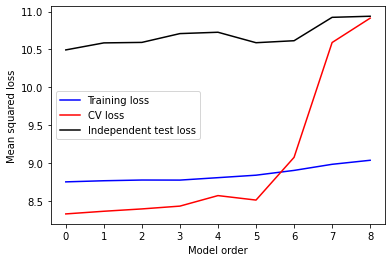

In [300]:
max_order = 8
Xkfold = []
Xktest = []
K = 5
N = ytrain.size
sizes = np.tile(np.int(N/float(K)),(1,K))
sizes[0,-1] = sizes[0,-1] + N - sizes.sum()
c_sizes = np.hstack((0,np.cumsum(sizes)))
Xkfold = np.ones_like(xtrain)
Xkfold = np.delete(Xkfold, 0, 1)
Xktest = np.ones_like(xtest)
Xktest = np.delete(Xktest, 0, 1)
cv_loss = np.zeros((K,max_order+1))
ind_loss = np.zeros((K,max_order+1))
train_loss = np.zeros((K,max_order+1))

for k in range(max_order+1):
    for fold in range(K):
        X_fold = Xkfold[c_sizes[fold]:c_sizes[fold+1],:]
        X_train = np.delete(Xkfold,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        y_fold = ytrain[c_sizes[fold]:c_sizes[fold+1]]
        y_train = np.delete(ytrain,np.arange(c_sizes[fold],c_sizes[fold+1],1),0)
        w = np.linalg.solve(np.dot(X_train.T,X_train),np.dot(X_train.T,y_train))
        fold_pred = np.dot(X_fold,w)
        cv_loss[fold,k] = ((fold_pred - y_fold)**2).mean()
        ind_pred = np.dot(Xktest,w)
        ind_loss[fold,k] = ((ind_pred - ytest)**2).mean()
        train_pred = np.dot(X_train,w)
        train_loss[fold,k] = ((train_pred - t_train)**2).mean()
    Xkfold = np.hstack((Xkfold,xtrain**(k+1)))
    Xktest = np.hstack((Xktest,xtest**(k+1)))
    #print (Xktest)
order = np.arange(max_order+1)
plt.plot(order,train_loss.mean(axis=0),'b-',label="Training loss")
plt.plot(order,cv_loss.mean(axis=0),'r-',label="CV loss")
plt.plot(order,ind_loss.mean(axis=0),'k',label="Independent test loss")
plt.legend()
plt.xlabel('Model order')
plt.ylabel('Mean squared loss')